<a href="https://colab.research.google.com/github/Marcus287/ACS-WIL-CustomerChurn/blob/master/Boxplot_Outlier_Removal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [8]:
file_path = r'/content/drive/MyDrive/dataset/customer_churn.csv'
dataset = pd.read_csv(file_path)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 103


In [10]:
data_cleaned = dataset.drop_duplicates()
print(f"Shape of the dataset after removing duplicates: {data_cleaned.shape}")

Shape of the dataset after removing duplicates: (6940, 10)


In [11]:
print(dataset.isnull().sum())

gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64


In [12]:
label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn']


In [13]:
for column in columns_to_encode:
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [14]:
dataset.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,0,0,0,1,0,0,0,0,29.85,0
1,1,0,0,34,1,0,0,1,56.95,0
2,1,0,0,2,1,0,0,0,53.85,1
3,1,0,0,45,0,0,0,1,42.30,0
4,0,0,0,2,1,0,1,0,70.70,1


In [15]:
X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 9)
X_test shape: (1409, 9)
y_train shape: (5634,)
y_test shape: (1409,)


In [17]:
X_train.head()

y_train.head()

,Churn
2142,0
1623,0
6074,1
1362,1
6754,0


In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_train_scaled_df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges
0,-1.025166,-0.437749,1.532186,-0.465683,0.329573,-0.860523,-0.887057,0.372908,-0.000474
1,-1.025166,-0.437749,-0.652662,0.885537,0.329573,1.162083,1.127324,1.577591,1.074754
2,0.975452,-0.437749,-0.652662,-1.284605,-3.034225,-0.860523,-0.887057,-0.831774,-1.376499
3,0.975452,-0.437749,-0.652662,-1.161766,0.329573,-0.860523,1.127324,-0.831774,0.177346
4,0.975452,-0.437749,1.532186,-1.325551,0.329573,1.162083,-0.887057,1.577591,-0.098524


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
file_path = r'/content/drive/MyDrive/dataset/processed_data.csv'
dataset = pd.read_csv(file_path)

In [23]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [26]:
data_cleaned = remove_outliers_iqr(dataset, 'MonthlyCharges')

In [27]:
print(f"Shape of the dataset after removing outliers: {data_cleaned.shape}")

Shape of the dataset after removing outliers: (6940, 14)


In [28]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'MonthlyCharges')

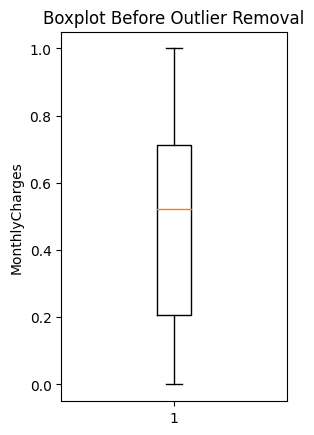

In [29]:
plt.subplot(1, 2, 1)
plt.title('Boxplot Before Outlier Removal')
plt.boxplot(dataset['MonthlyCharges'])
plt.ylabel('MonthlyCharges')


Text(0, 0.5, 'MonthlyCharges')

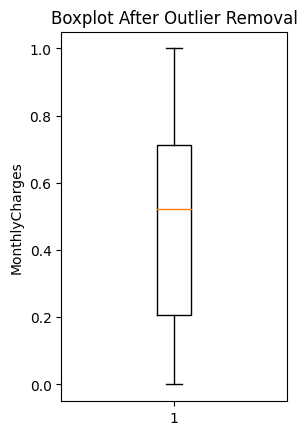

In [30]:
plt.subplot(1, 2, 2)
plt.title('Boxplot After Outlier Removal')
plt.boxplot(data_cleaned['MonthlyCharges'])
plt.ylabel('MonthlyCharges')

In [31]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>